In [1]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=d1e0733538ed294fa143d3ee3f4a4c866038ba215db786329ff8087b178abeb2
  Stored in directory: c:\users\akash koottungal\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=13d8d109ece22a987768964a2d0eea64aaf09f107e3e867716c1933ec8e56fe0
  Stored in directory: c:\users\akash koottungal\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30707 sha256=b0971612bc082f19383864bd209ae79ae80fb7890f7eb9cee6e09c034ce584ee
  Stored in directory: c:\users\akash koottungal\appdata\local\pip\cache\wheels\f1\60\77\22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
Successfully built termcolor wrapt clang
  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Uninstall

In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import logging

In [4]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
celsius_train    = np.array([-40, -10,  0,  8.8, 15, 22,  38],  dtype=float)
fahrenheit_train = np.array([-40,  14, 32, 47.84, 59, 72, 100],  dtype=float)

In [6]:
for i,c in enumerate(celsius_train):
    print('{} degree celsius = {} degree fahrenheit'.format(c,fahrenheit_train[i]))

-40.0 degree celsius = -40.0 degree fahrenheit
-10.0 degree celsius = 14.0 degree fahrenheit
0.0 degree celsius = 32.0 degree fahrenheit
8.8 degree celsius = 47.84 degree fahrenheit
15.0 degree celsius = 59.0 degree fahrenheit
22.0 degree celsius = 72.0 degree fahrenheit
38.0 degree celsius = 100.0 degree fahrenheit


### To build a layer in tensorflow

In [12]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
# input_shape= [1] means it is a 1D array with one value
# units = 1 means the number of neurons in the layer

### To build the model

In [13]:
model = tf.keras.Sequential([l0])

### Both the steps can be merged into one for creating a model..which is mostly used

### Compile the model

In [14]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
# loss = loss function to check the deviation of predicted output from the correct output
# optimizer = optimization function to adjust internal to minimize the loss
# One part of the Optimizer you may need to think about when building your own models is the
  #learning rate (0.1 in the code above). 
    #This is the step size taken when adjusting values in the model. 
    #If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down.
    #Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1

### Train the model/

In [20]:
model_train = model.fit(celsius_train, fahrenheit_train, epochs=500, verbose=False)
print('Model training done')
#  The epochs argument specifies how many times this cycle should be run
#  and the verbose argument controls how much output the method produces.

Model training done


### Model training statistics display

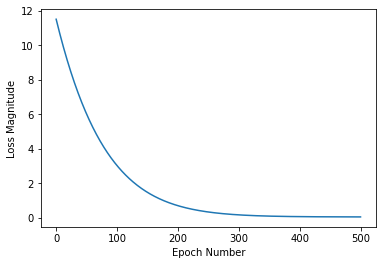

In [26]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(model_train.history['loss'])

### Prediction using model

In [28]:
print(model.predict([100.0]))

[[211.83252]]


In [ ]:
print("These are the layer variables: {}".format(l0.get_weights()))